# Visualizing distributions

In this notebook, we will discuss how we can visualize distribution of values effectively using seaborn. 
Our running example will be the [penguins dataset](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data). 

Let's import the necessary libraries and load the dataset. 

In [1]:

import matplotlib as mpl


mpl.rcParams['figure.dpi'] = 100

import seaborn as sns


sns.set_style("whitegrid")

import numpy as np

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Averages and more

Using pandas describe method, we can get a first overview of the data. We see the range of values for the individual features, the mean, standard dviation as well as the 25, 50 and 75% quartile. 

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Discussion Questions** 

- What is good about reporting the mean and standard deviations of each feature? What are potential problems?
- Do you know another name of the 50% percentile?
- What happens to the individual measures if there are outliers in the data? Which one would be affected?

### Histogram

Reporting numbers, such as the mean and standard deviation is useful, but reduces the amount of information in the data. 
We also need to be careful that the numbers we report really tell us something meaningful about the data. 
We can a more complete picture by visualizing a histogram of the data. 

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

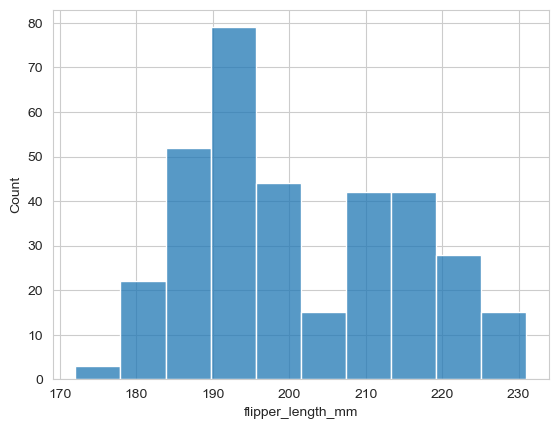

In [5]:
sns.histplot(data=penguins, x="flipper_length_mm")

**Discussion question:** 

- Why is reporting the mean in this case not so useful?

### Stratification

We can get an even better picture by stratifying the dataset with regard to the species. 

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

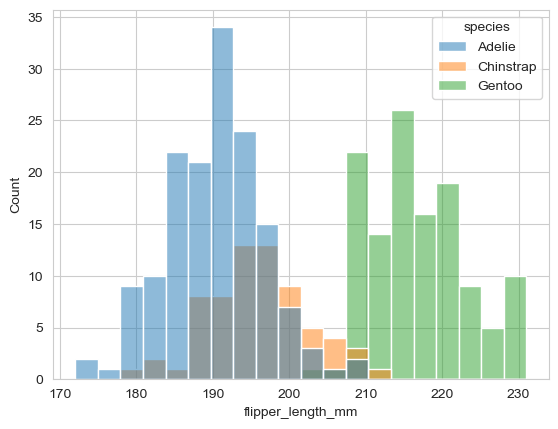

In [6]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="layer", bins=20)

We see that the histogram provides with a much more complete picture. But even this plot can be misleading. 

**Discussion question:** 
- How do you choose the number of bins?
- What can go wrong when you choose the wrong number of bins?

### Density plots

Histograms divide the data into a discrete number of bins. If we have enough data and choose the bin size small, the resulting plot resembles a continuous distribution, as shown in the following experiment:

<Axes: ylabel='Count'>

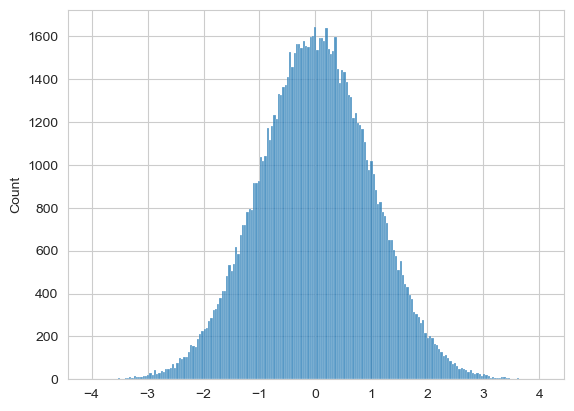

In [7]:
sns.histplot(x=np.random.randn(100000), bins=200)

When we know that the distribution is indeed continuous (and smooth) there is a possibility to use that knowledge and smooth out the steps that occur from the sampling of the data. This can be done using *kernel density estimation (kde)* and the resulting plot is what is called a density plot in seaborn.

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

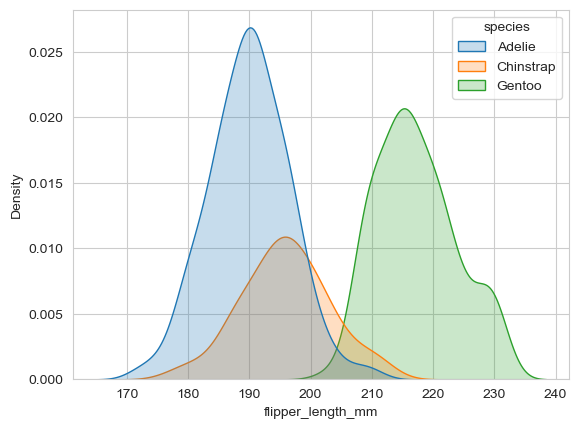

In [8]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="layer", fill=True)

If the assumptions hold, the plot is very useful and conveys a lot of information about the density. It can be much more informative than just reporting a mean, or showing one simple histogram. A density plot can also be created using a figure level plot in seaborn. 

/Users/nirazul/opt/anaconda3/envs/intro-data-science/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


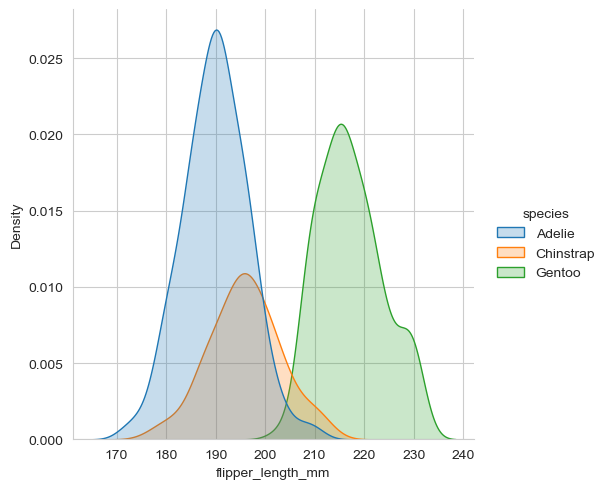

In [10]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde", fill="true")